<a href="https://colab.research.google.com/github/harshvs4/Normalization_Regularization/blob/main/combined_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/harsh/'
%cd $BASE_DIR
from utils import train, test, model,plot_metrics,helper,data_loader 
import torch

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt


!pip install torchsummary

/content/drive/MyDrive/harsh
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)

cuda = torch.cuda.is_available()
if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")

In [4]:
train_transforms, test_transforms = data_loader.data_augmentation()
train,test = data_loader.download_mnist_data(train_transforms, test_transforms)

In [5]:
BATCH_SIZE_GPU = 64
BATCH_SIZE_CPU = 64

dataloader_args = dict(shuffle=True, batch_size=BATCH_SIZE_GPU, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=BATCH_SIZE_CPU)
train_loader, test_loader = data_loader.dataloader(train, test,dataloader_args)

In [6]:
exp_metrics={}
EPOCH=20
dropout=0.03

# LayerNorm with no regularization

In [7]:
experiment_name='LayerNorm'
norm_type='LN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,'LN',l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=0.12121044099330902 Batch_id=937 Accuracy=76.65: 100%|██████████| 938/938 [00:46<00:00, 20.16it/s]



Test set: Average loss: 0.1445, Accuracy: 9658/10000 (96.58%)

Epoch 2:


Loss=0.04636501520872116 Batch_id=937 Accuracy=95.11: 100%|██████████| 938/938 [00:39<00:00, 23.50it/s]



Test set: Average loss: 0.0528, Accuracy: 9841/10000 (98.41%)

Epoch 3:


Loss=0.029457343742251396 Batch_id=937 Accuracy=96.38: 100%|██████████| 938/938 [00:39<00:00, 23.50it/s]



Test set: Average loss: 0.0499, Accuracy: 9845/10000 (98.45%)

Epoch 4:


Loss=0.016114093363285065 Batch_id=937 Accuracy=96.97: 100%|██████████| 938/938 [00:41<00:00, 22.75it/s]



Test set: Average loss: 0.0331, Accuracy: 9892/10000 (98.92%)

Epoch 5:


Loss=0.08776716142892838 Batch_id=937 Accuracy=97.38: 100%|██████████| 938/938 [00:39<00:00, 23.63it/s]



Test set: Average loss: 0.0345, Accuracy: 9899/10000 (98.99%)

Epoch 6:


Loss=0.10446244478225708 Batch_id=937 Accuracy=97.60: 100%|██████████| 938/938 [00:39<00:00, 23.46it/s]



Test set: Average loss: 0.0332, Accuracy: 9906/10000 (99.06%)

Epoch 7:


Loss=0.009683732874691486 Batch_id=937 Accuracy=97.81: 100%|██████████| 938/938 [00:40<00:00, 23.32it/s]



Test set: Average loss: 0.0263, Accuracy: 9914/10000 (99.14%)

Epoch 8:


Loss=0.1708672046661377 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [00:40<00:00, 23.36it/s]



Test set: Average loss: 0.0260, Accuracy: 9920/10000 (99.20%)

Epoch 9:


Loss=0.013498562388122082 Batch_id=937 Accuracy=98.10: 100%|██████████| 938/938 [00:41<00:00, 22.52it/s]



Test set: Average loss: 0.0212, Accuracy: 9935/10000 (99.35%)

Epoch 10:


Loss=0.18722021579742432 Batch_id=937 Accuracy=98.16: 100%|██████████| 938/938 [00:39<00:00, 23.57it/s]



Test set: Average loss: 0.0254, Accuracy: 9915/10000 (99.15%)

Epoch 11:


Loss=0.01003762986510992 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:39<00:00, 23.62it/s]



Test set: Average loss: 0.0223, Accuracy: 9927/10000 (99.27%)

Epoch 12:


Loss=0.013165070675313473 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:39<00:00, 23.56it/s]



Test set: Average loss: 0.0250, Accuracy: 9928/10000 (99.28%)

Epoch 13:


Loss=0.0033657681196928024 Batch_id=937 Accuracy=98.41: 100%|██████████| 938/938 [00:41<00:00, 22.42it/s]



Test set: Average loss: 0.0209, Accuracy: 9936/10000 (99.36%)

Epoch 14:


Loss=0.009490170516073704 Batch_id=937 Accuracy=98.46: 100%|██████████| 938/938 [00:39<00:00, 23.62it/s]



Test set: Average loss: 0.0191, Accuracy: 9942/10000 (99.42%)

Epoch 15:


Loss=0.31099846959114075 Batch_id=937 Accuracy=98.58: 100%|██████████| 938/938 [00:39<00:00, 23.57it/s]



Test set: Average loss: 0.0184, Accuracy: 9944/10000 (99.44%)

Epoch 16:


Loss=0.2368745058774948 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [00:39<00:00, 23.70it/s]



Test set: Average loss: 0.0194, Accuracy: 9942/10000 (99.42%)

Epoch 17:


Loss=0.009784123860299587 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:39<00:00, 23.91it/s]



Test set: Average loss: 0.0190, Accuracy: 9940/10000 (99.40%)

Epoch 18:


Loss=0.11512430757284164 Batch_id=937 Accuracy=98.80: 100%|██████████| 938/938 [00:41<00:00, 22.81it/s]



Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

Epoch 19:


Loss=0.35514065623283386 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [00:39<00:00, 23.91it/s]



Test set: Average loss: 0.0166, Accuracy: 9950/10000 (99.50%)

Epoch 20:


Loss=0.0075953369960188866 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [00:38<00:00, 24.31it/s]



Test set: Average loss: 0.0166, Accuracy: 9953/10000 (99.53%)



Total wrong predictions are 47


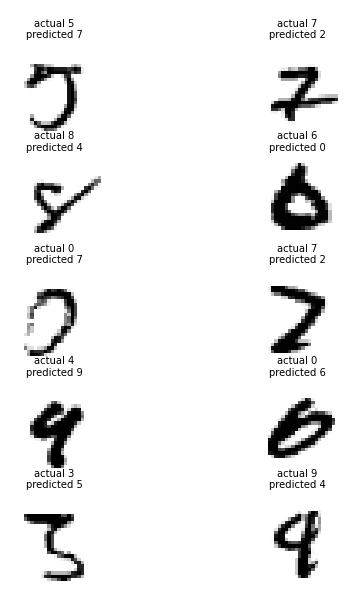

In [8]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# GroupNorm with no regularization

In [9]:
experiment_name='GroupNorm'
norm_type='GN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=0.5071306824684143 Batch_id=937 Accuracy=73.81: 100%|██████████| 938/938 [00:38<00:00, 24.55it/s]



Test set: Average loss: 0.1800, Accuracy: 9575/10000 (95.75%)

Epoch 2:


Loss=0.1265510618686676 Batch_id=937 Accuracy=93.48: 100%|██████████| 938/938 [00:38<00:00, 24.37it/s]



Test set: Average loss: 0.0775, Accuracy: 9794/10000 (97.94%)

Epoch 3:


Loss=0.42962709069252014 Batch_id=937 Accuracy=95.61: 100%|██████████| 938/938 [00:39<00:00, 23.46it/s]



Test set: Average loss: 0.0610, Accuracy: 9832/10000 (98.32%)

Epoch 4:


Loss=0.09580110758543015 Batch_id=937 Accuracy=96.50: 100%|██████████| 938/938 [00:38<00:00, 24.41it/s]



Test set: Average loss: 0.0416, Accuracy: 9890/10000 (98.90%)

Epoch 5:


Loss=0.06246509775519371 Batch_id=937 Accuracy=96.91: 100%|██████████| 938/938 [00:37<00:00, 24.78it/s]



Test set: Average loss: 0.0346, Accuracy: 9905/10000 (99.05%)

Epoch 6:


Loss=0.011787653900682926 Batch_id=937 Accuracy=97.26: 100%|██████████| 938/938 [00:37<00:00, 24.87it/s]



Test set: Average loss: 0.0560, Accuracy: 9825/10000 (98.25%)

Epoch 7:


Loss=0.01215006411075592 Batch_id=937 Accuracy=97.54: 100%|██████████| 938/938 [00:37<00:00, 24.68it/s]



Test set: Average loss: 0.0343, Accuracy: 9909/10000 (99.09%)

Epoch 8:


Loss=0.006530712824314833 Batch_id=937 Accuracy=97.73: 100%|██████████| 938/938 [00:39<00:00, 23.57it/s]



Test set: Average loss: 0.0295, Accuracy: 9918/10000 (99.18%)

Epoch 9:


Loss=0.3161182701587677 Batch_id=937 Accuracy=97.74: 100%|██████████| 938/938 [00:37<00:00, 24.73it/s]



Test set: Average loss: 0.0325, Accuracy: 9909/10000 (99.09%)

Epoch 10:


Loss=0.1449187844991684 Batch_id=937 Accuracy=97.93: 100%|██████████| 938/938 [00:38<00:00, 24.54it/s]



Test set: Average loss: 0.0269, Accuracy: 9929/10000 (99.29%)

Epoch 11:


Loss=0.003790496615692973 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [00:38<00:00, 24.09it/s]



Test set: Average loss: 0.0276, Accuracy: 9915/10000 (99.15%)

Epoch 12:


Loss=0.006484667304903269 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:39<00:00, 23.71it/s]



Test set: Average loss: 0.0248, Accuracy: 9923/10000 (99.23%)

Epoch 13:


Loss=0.0051682814955711365 Batch_id=937 Accuracy=98.22: 100%|██████████| 938/938 [00:42<00:00, 22.03it/s]



Test set: Average loss: 0.0243, Accuracy: 9925/10000 (99.25%)

Epoch 14:


Loss=0.09728041291236877 Batch_id=937 Accuracy=98.35: 100%|██████████| 938/938 [00:40<00:00, 22.94it/s]



Test set: Average loss: 0.0224, Accuracy: 9931/10000 (99.31%)

Epoch 15:


Loss=0.04191896691918373 Batch_id=937 Accuracy=98.31: 100%|██████████| 938/938 [00:40<00:00, 22.94it/s]



Test set: Average loss: 0.0228, Accuracy: 9931/10000 (99.31%)

Epoch 16:


Loss=0.16579867899417877 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:39<00:00, 23.58it/s]



Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

Epoch 17:


Loss=0.001927073230035603 Batch_id=937 Accuracy=98.63: 100%|██████████| 938/938 [00:39<00:00, 23.71it/s]



Test set: Average loss: 0.0211, Accuracy: 9939/10000 (99.39%)

Epoch 18:


Loss=0.009654030203819275 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [00:41<00:00, 22.73it/s]



Test set: Average loss: 0.0194, Accuracy: 9941/10000 (99.41%)

Epoch 19:


Loss=0.011704078875482082 Batch_id=937 Accuracy=98.71: 100%|██████████| 938/938 [00:39<00:00, 23.69it/s]



Test set: Average loss: 0.0187, Accuracy: 9944/10000 (99.44%)

Epoch 20:


Loss=0.0022614668123424053 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:39<00:00, 23.77it/s]



Test set: Average loss: 0.0191, Accuracy: 9941/10000 (99.41%)



# Model Summary

In [10]:
#helper.model_summary(model,(1,28,28))

# Misclassified Images for Exp2

Total wrong predictions are 59


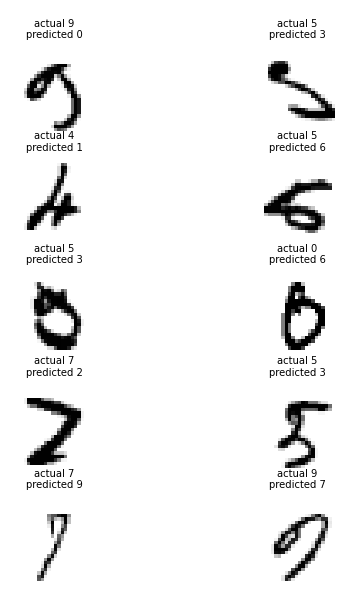

In [11]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# BatchNorm with L1 regularization

In [12]:
experiment_name='BatchNorm+L1'
norm_type='BN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=0.6999032497406006 Batch_id=937 Accuracy=76.63: 100%|██████████| 938/938 [00:40<00:00, 22.90it/s]



Test set: Average loss: 0.1432, Accuracy: 9617/10000 (96.17%)

Epoch 2:


Loss=0.4520042836666107 Batch_id=937 Accuracy=94.11: 100%|██████████| 938/938 [00:41<00:00, 22.67it/s]



Test set: Average loss: 0.0776, Accuracy: 9760/10000 (97.60%)

Epoch 3:


Loss=0.4728822112083435 Batch_id=937 Accuracy=95.05: 100%|██████████| 938/938 [00:40<00:00, 23.34it/s]



Test set: Average loss: 0.0772, Accuracy: 9743/10000 (97.43%)

Epoch 4:


Loss=0.4914086163043976 Batch_id=937 Accuracy=95.24: 100%|██████████| 938/938 [00:40<00:00, 23.43it/s]



Test set: Average loss: 0.0784, Accuracy: 9769/10000 (97.69%)

Epoch 5:


Loss=0.8242319226264954 Batch_id=937 Accuracy=95.54: 100%|██████████| 938/938 [00:39<00:00, 23.46it/s]



Test set: Average loss: 0.0854, Accuracy: 9715/10000 (97.15%)

Epoch 6:


Loss=0.35425296425819397 Batch_id=937 Accuracy=95.59: 100%|██████████| 938/938 [00:40<00:00, 23.33it/s]



Test set: Average loss: 0.0725, Accuracy: 9773/10000 (97.73%)

Epoch 7:


Loss=0.4247889518737793 Batch_id=937 Accuracy=95.53: 100%|██████████| 938/938 [00:41<00:00, 22.41it/s]



Test set: Average loss: 0.0713, Accuracy: 9783/10000 (97.83%)

Epoch 8:


Loss=0.3371009826660156 Batch_id=937 Accuracy=95.69: 100%|██████████| 938/938 [00:40<00:00, 23.30it/s]



Test set: Average loss: 0.0654, Accuracy: 9786/10000 (97.86%)

Epoch 9:


Loss=0.36258620023727417 Batch_id=937 Accuracy=95.82: 100%|██████████| 938/938 [00:40<00:00, 23.42it/s]



Test set: Average loss: 0.0735, Accuracy: 9772/10000 (97.72%)

Epoch 10:


Loss=0.5870799422264099 Batch_id=937 Accuracy=95.81: 100%|██████████| 938/938 [00:39<00:00, 23.47it/s]



Test set: Average loss: 0.0596, Accuracy: 9810/10000 (98.10%)

Epoch 11:


Loss=0.5353160500526428 Batch_id=937 Accuracy=95.78: 100%|██████████| 938/938 [00:40<00:00, 23.05it/s]



Test set: Average loss: 0.0551, Accuracy: 9825/10000 (98.25%)

Epoch 12:


Loss=0.38884779810905457 Batch_id=937 Accuracy=95.95: 100%|██████████| 938/938 [00:41<00:00, 22.42it/s]



Test set: Average loss: 0.0548, Accuracy: 9822/10000 (98.22%)

Epoch 13:


Loss=0.5931605100631714 Batch_id=937 Accuracy=96.05: 100%|██████████| 938/938 [00:40<00:00, 23.24it/s]



Test set: Average loss: 0.0597, Accuracy: 9813/10000 (98.13%)

Epoch 14:


Loss=0.5973575115203857 Batch_id=937 Accuracy=96.10: 100%|██████████| 938/938 [00:40<00:00, 23.44it/s]



Test set: Average loss: 0.0427, Accuracy: 9854/10000 (98.54%)

Epoch 15:


Loss=0.8872842788696289 Batch_id=937 Accuracy=96.31: 100%|██████████| 938/938 [00:40<00:00, 23.44it/s]



Test set: Average loss: 0.0783, Accuracy: 9773/10000 (97.73%)

Epoch 16:


Loss=0.5744814276695251 Batch_id=937 Accuracy=96.52: 100%|██████████| 938/938 [00:40<00:00, 23.11it/s]



Test set: Average loss: 0.0406, Accuracy: 9863/10000 (98.63%)

Epoch 17:


Loss=0.30259087681770325 Batch_id=937 Accuracy=96.87: 100%|██████████| 938/938 [00:40<00:00, 23.34it/s]



Test set: Average loss: 0.0317, Accuracy: 9901/10000 (99.01%)

Epoch 18:


Loss=0.3416006565093994 Batch_id=937 Accuracy=97.22: 100%|██████████| 938/938 [00:40<00:00, 23.24it/s]



Test set: Average loss: 0.0282, Accuracy: 9914/10000 (99.14%)

Epoch 19:


Loss=0.1963348686695099 Batch_id=937 Accuracy=97.75: 100%|██████████| 938/938 [00:40<00:00, 23.40it/s]



Test set: Average loss: 0.0236, Accuracy: 9927/10000 (99.27%)

Epoch 20:


Loss=0.24869537353515625 Batch_id=937 Accuracy=98.03: 100%|██████████| 938/938 [00:40<00:00, 23.35it/s]



Test set: Average loss: 0.0214, Accuracy: 9938/10000 (99.38%)



# Misclassified Images for Exp3

Total wrong predictions are 62


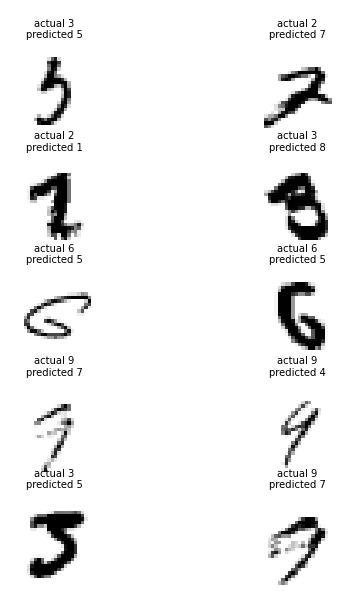

In [13]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# GroupNorm with L1 regularization

In [14]:
experiment_name='GroupNorm+L1'
norm_type='GN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=0.9372283220291138 Batch_id=937 Accuracy=66.81: 100%|██████████| 938/938 [00:41<00:00, 22.58it/s]



Test set: Average loss: 0.1960, Accuracy: 9559/10000 (95.59%)

Epoch 2:


Loss=0.6502687931060791 Batch_id=937 Accuracy=92.89: 100%|██████████| 938/938 [00:40<00:00, 23.44it/s]



Test set: Average loss: 0.0755, Accuracy: 9797/10000 (97.97%)

Epoch 3:


Loss=0.6893151998519897 Batch_id=937 Accuracy=94.31: 100%|██████████| 938/938 [00:40<00:00, 23.31it/s]



Test set: Average loss: 0.0931, Accuracy: 9747/10000 (97.47%)

Epoch 4:


Loss=0.5330778360366821 Batch_id=937 Accuracy=94.74: 100%|██████████| 938/938 [00:40<00:00, 23.34it/s]



Test set: Average loss: 0.0851, Accuracy: 9792/10000 (97.92%)

Epoch 5:


Loss=0.6846919059753418 Batch_id=937 Accuracy=95.13: 100%|██████████| 938/938 [00:40<00:00, 23.39it/s]



Test set: Average loss: 0.0626, Accuracy: 9826/10000 (98.26%)

Epoch 6:


Loss=0.623128354549408 Batch_id=937 Accuracy=95.26: 100%|██████████| 938/938 [00:42<00:00, 22.29it/s]



Test set: Average loss: 0.0682, Accuracy: 9813/10000 (98.13%)

Epoch 7:


Loss=0.43724381923675537 Batch_id=937 Accuracy=95.17: 100%|██████████| 938/938 [00:40<00:00, 23.30it/s]



Test set: Average loss: 0.0686, Accuracy: 9820/10000 (98.20%)

Epoch 8:


Loss=1.137026309967041 Batch_id=937 Accuracy=94.99: 100%|██████████| 938/938 [00:40<00:00, 23.34it/s]



Test set: Average loss: 0.1649, Accuracy: 9532/10000 (95.32%)

Epoch 9:


Loss=0.5314998030662537 Batch_id=937 Accuracy=95.41: 100%|██████████| 938/938 [00:39<00:00, 23.47it/s]



Test set: Average loss: 0.0584, Accuracy: 9834/10000 (98.34%)

Epoch 10:


Loss=0.5765915513038635 Batch_id=937 Accuracy=95.39: 100%|██████████| 938/938 [00:41<00:00, 22.52it/s]



Test set: Average loss: 0.0731, Accuracy: 9799/10000 (97.99%)

Epoch 11:


Loss=0.4048769474029541 Batch_id=937 Accuracy=95.90: 100%|██████████| 938/938 [00:40<00:00, 23.25it/s]



Test set: Average loss: 0.1159, Accuracy: 9700/10000 (97.00%)

Epoch 12:


Loss=0.5182112455368042 Batch_id=937 Accuracy=95.47: 100%|██████████| 938/938 [00:40<00:00, 23.15it/s]



Test set: Average loss: 0.0596, Accuracy: 9837/10000 (98.37%)

Epoch 13:


Loss=0.550658643245697 Batch_id=937 Accuracy=96.02: 100%|██████████| 938/938 [00:40<00:00, 23.42it/s]



Test set: Average loss: 0.0604, Accuracy: 9838/10000 (98.38%)

Epoch 14:


Loss=0.5356786251068115 Batch_id=937 Accuracy=96.08: 100%|██████████| 938/938 [00:40<00:00, 23.19it/s]



Test set: Average loss: 0.0681, Accuracy: 9821/10000 (98.21%)

Epoch 15:


Loss=0.3151366114616394 Batch_id=937 Accuracy=96.31: 100%|██████████| 938/938 [00:41<00:00, 22.36it/s]



Test set: Average loss: 0.0491, Accuracy: 9866/10000 (98.66%)

Epoch 16:


Loss=0.35488903522491455 Batch_id=937 Accuracy=96.40: 100%|██████████| 938/938 [00:40<00:00, 23.11it/s]



Test set: Average loss: 0.0486, Accuracy: 9874/10000 (98.74%)

Epoch 17:


Loss=0.2927353084087372 Batch_id=937 Accuracy=96.94: 100%|██████████| 938/938 [00:40<00:00, 23.11it/s]



Test set: Average loss: 0.0451, Accuracy: 9861/10000 (98.61%)

Epoch 18:


Loss=0.3263954222202301 Batch_id=937 Accuracy=97.45: 100%|██████████| 938/938 [00:40<00:00, 23.19it/s]



Test set: Average loss: 0.0389, Accuracy: 9908/10000 (99.08%)

Epoch 19:


Loss=0.2366868406534195 Batch_id=937 Accuracy=97.88: 100%|██████████| 938/938 [00:40<00:00, 23.25it/s]



Test set: Average loss: 0.0314, Accuracy: 9916/10000 (99.16%)

Epoch 20:


Loss=0.2451169639825821 Batch_id=937 Accuracy=98.24: 100%|██████████| 938/938 [00:39<00:00, 23.45it/s]



Test set: Average loss: 0.0289, Accuracy: 9929/10000 (99.29%)



# Misclassified Images for Exp4

Total wrong predictions are 71


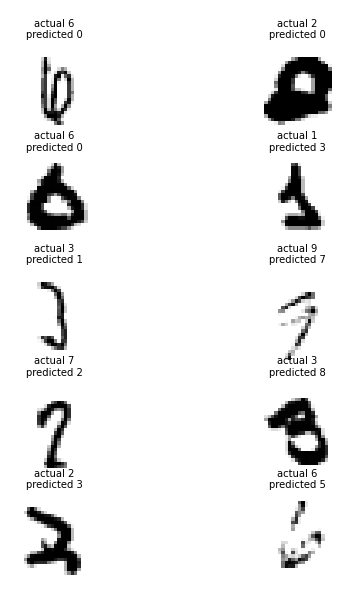

In [15]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# LayerNorm with L2 regularization

In [7]:
experiment_name='LayerNorm+L2'
norm_type='LN'
l1_factor=0
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=0.2563927173614502 Batch_id=937 Accuracy=77.06: 100%|██████████| 938/938 [01:29<00:00, 10.51it/s]



Test set: Average loss: 0.1339, Accuracy: 9700/10000 (97.00%)

Epoch 2:


Loss=0.17054234445095062 Batch_id=937 Accuracy=94.83: 100%|██████████| 938/938 [01:28<00:00, 10.54it/s]



Test set: Average loss: 0.0498, Accuracy: 9863/10000 (98.63%)

Epoch 3:


Loss=0.07092521339654922 Batch_id=937 Accuracy=96.10: 100%|██████████| 938/938 [01:28<00:00, 10.55it/s]



Test set: Average loss: 0.0510, Accuracy: 9864/10000 (98.64%)

Epoch 4:


Loss=0.042779985815286636 Batch_id=937 Accuracy=96.82: 100%|██████████| 938/938 [01:31<00:00, 10.21it/s]



Test set: Average loss: 0.0440, Accuracy: 9888/10000 (98.88%)

Epoch 5:


Loss=0.04148019105195999 Batch_id=937 Accuracy=97.07: 100%|██████████| 938/938 [01:29<00:00, 10.53it/s]



Test set: Average loss: 0.0374, Accuracy: 9892/10000 (98.92%)

Epoch 6:


Loss=0.06310521811246872 Batch_id=937 Accuracy=97.27: 100%|██████████| 938/938 [01:29<00:00, 10.45it/s]



Test set: Average loss: 0.0321, Accuracy: 9903/10000 (99.03%)

Epoch 7:


Loss=0.08381294459104538 Batch_id=937 Accuracy=97.61: 100%|██████████| 938/938 [01:30<00:00, 10.32it/s]



Test set: Average loss: 0.0312, Accuracy: 9911/10000 (99.11%)

Epoch 8:


Loss=0.04318604618310928 Batch_id=937 Accuracy=97.65: 100%|██████████| 938/938 [01:28<00:00, 10.56it/s]



Test set: Average loss: 0.0348, Accuracy: 9890/10000 (98.90%)

Epoch 9:


Loss=0.06550870835781097 Batch_id=937 Accuracy=97.80: 100%|██████████| 938/938 [01:30<00:00, 10.34it/s]



Test set: Average loss: 0.0315, Accuracy: 9902/10000 (99.02%)

Epoch 10:


Loss=0.05030936375260353 Batch_id=937 Accuracy=97.83: 100%|██████████| 938/938 [01:30<00:00, 10.35it/s]



Test set: Average loss: 0.0308, Accuracy: 9915/10000 (99.15%)

Epoch 11:


Loss=0.015551906079053879 Batch_id=937 Accuracy=97.94: 100%|██████████| 938/938 [01:33<00:00, 10.05it/s]



Test set: Average loss: 0.0291, Accuracy: 9911/10000 (99.11%)

Epoch 12:


Loss=0.19293762743473053 Batch_id=937 Accuracy=97.93: 100%|██████████| 938/938 [01:31<00:00, 10.25it/s]



Test set: Average loss: 0.0296, Accuracy: 9917/10000 (99.17%)

Epoch 13:


Loss=0.21784384548664093 Batch_id=937 Accuracy=98.03: 100%|██████████| 938/938 [01:28<00:00, 10.62it/s]



Test set: Average loss: 0.0365, Accuracy: 9895/10000 (98.95%)

Epoch 14:


Loss=0.02312791720032692 Batch_id=937 Accuracy=98.18: 100%|██████████| 938/938 [01:30<00:00, 10.35it/s]



Test set: Average loss: 0.0245, Accuracy: 9927/10000 (99.27%)

Epoch 15:


Loss=0.0068067521788179874 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [01:29<00:00, 10.47it/s]



Test set: Average loss: 0.0263, Accuracy: 9928/10000 (99.28%)

Epoch 16:


Loss=0.016763651743531227 Batch_id=937 Accuracy=98.36: 100%|██████████| 938/938 [01:29<00:00, 10.47it/s]



Test set: Average loss: 0.0204, Accuracy: 9939/10000 (99.39%)

Epoch 17:


Loss=0.06764395534992218 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [01:27<00:00, 10.67it/s]



Test set: Average loss: 0.0235, Accuracy: 9934/10000 (99.34%)

Epoch 18:


Loss=0.01815970242023468 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [01:28<00:00, 10.58it/s]



Test set: Average loss: 0.0203, Accuracy: 9939/10000 (99.39%)

Epoch 19:


Loss=0.01121598295867443 Batch_id=937 Accuracy=98.89: 100%|██████████| 938/938 [01:31<00:00, 10.30it/s]



Test set: Average loss: 0.0172, Accuracy: 9948/10000 (99.48%)

Epoch 20:


Loss=0.037896666675806046 Batch_id=937 Accuracy=98.91: 100%|██████████| 938/938 [01:30<00:00, 10.39it/s]



Test set: Average loss: 0.0170, Accuracy: 9952/10000 (99.52%)



# Misclassified Images for Exp5

Total wrong predictions are 48


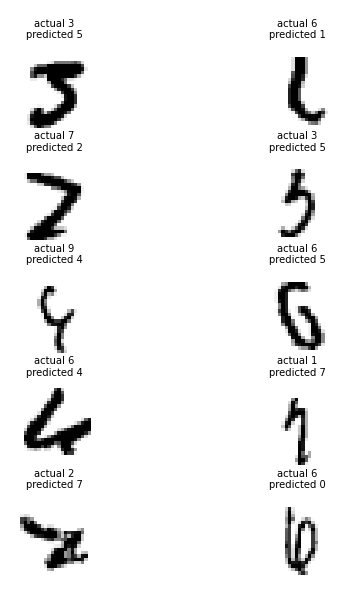

In [8]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# BatchNorm with L1 and L2 regularization

In [9]:
experiment_name='BatchNorm+L1+L2'
norm_type='BN'
l1_factor=0.001
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=1.0233005285263062 Batch_id=937 Accuracy=77.33: 100%|██████████| 938/938 [01:34<00:00,  9.96it/s]



Test set: Average loss: 0.1114, Accuracy: 9763/10000 (97.63%)

Epoch 2:


Loss=0.48971933126449585 Batch_id=937 Accuracy=94.46: 100%|██████████| 938/938 [01:33<00:00,  9.98it/s]



Test set: Average loss: 0.0648, Accuracy: 9807/10000 (98.07%)

Epoch 3:


Loss=0.4622931480407715 Batch_id=937 Accuracy=95.21: 100%|██████████| 938/938 [01:35<00:00,  9.78it/s]



Test set: Average loss: 0.0763, Accuracy: 9764/10000 (97.64%)

Epoch 4:


Loss=0.5543947219848633 Batch_id=937 Accuracy=95.25: 100%|██████████| 938/938 [01:35<00:00,  9.80it/s]



Test set: Average loss: 0.0714, Accuracy: 9790/10000 (97.90%)

Epoch 5:


Loss=0.44755423069000244 Batch_id=937 Accuracy=95.49: 100%|██████████| 938/938 [01:34<00:00,  9.92it/s]



Test set: Average loss: 0.0525, Accuracy: 9849/10000 (98.49%)

Epoch 6:


Loss=0.5006600022315979 Batch_id=937 Accuracy=95.30: 100%|██████████| 938/938 [01:34<00:00,  9.89it/s]



Test set: Average loss: 0.0609, Accuracy: 9827/10000 (98.27%)

Epoch 7:


Loss=0.45518213510513306 Batch_id=937 Accuracy=95.39: 100%|██████████| 938/938 [01:32<00:00, 10.14it/s]



Test set: Average loss: 0.0608, Accuracy: 9832/10000 (98.32%)

Epoch 8:


Loss=0.48001545667648315 Batch_id=937 Accuracy=95.50: 100%|██████████| 938/938 [01:30<00:00, 10.32it/s]



Test set: Average loss: 0.1523, Accuracy: 9540/10000 (95.40%)

Epoch 9:


Loss=0.32285985350608826 Batch_id=937 Accuracy=95.35: 100%|██████████| 938/938 [01:34<00:00,  9.88it/s]



Test set: Average loss: 0.0740, Accuracy: 9786/10000 (97.86%)

Epoch 10:


Loss=0.5031091570854187 Batch_id=937 Accuracy=95.48: 100%|██████████| 938/938 [01:33<00:00, 10.03it/s]



Test set: Average loss: 0.0889, Accuracy: 9721/10000 (97.21%)

Epoch 11:


Loss=0.46800971031188965 Batch_id=937 Accuracy=95.58: 100%|██████████| 938/938 [01:33<00:00, 10.02it/s]



Test set: Average loss: 0.0547, Accuracy: 9845/10000 (98.45%)

Epoch 12:


Loss=0.31650876998901367 Batch_id=937 Accuracy=95.78: 100%|██████████| 938/938 [01:32<00:00, 10.18it/s]



Test set: Average loss: 0.0669, Accuracy: 9814/10000 (98.14%)

Epoch 13:


Loss=0.48620349168777466 Batch_id=937 Accuracy=95.74: 100%|██████████| 938/938 [01:33<00:00, 10.00it/s]



Test set: Average loss: 0.0492, Accuracy: 9843/10000 (98.43%)

Epoch 14:


Loss=0.44124773144721985 Batch_id=937 Accuracy=95.86: 100%|██████████| 938/938 [01:34<00:00,  9.91it/s]



Test set: Average loss: 0.0756, Accuracy: 9775/10000 (97.75%)

Epoch 15:


Loss=0.48989832401275635 Batch_id=937 Accuracy=96.25: 100%|██████████| 938/938 [01:33<00:00, 10.04it/s]



Test set: Average loss: 0.0534, Accuracy: 9827/10000 (98.27%)

Epoch 16:


Loss=0.3244588077068329 Batch_id=937 Accuracy=96.31: 100%|██████████| 938/938 [01:33<00:00, 10.02it/s]



Test set: Average loss: 0.0522, Accuracy: 9831/10000 (98.31%)

Epoch 17:


Loss=0.29241815209388733 Batch_id=937 Accuracy=96.68: 100%|██████████| 938/938 [01:30<00:00, 10.32it/s]



Test set: Average loss: 0.0416, Accuracy: 9881/10000 (98.81%)

Epoch 18:


Loss=0.22008025646209717 Batch_id=937 Accuracy=97.14: 100%|██████████| 938/938 [01:33<00:00, 10.04it/s]



Test set: Average loss: 0.0303, Accuracy: 9908/10000 (99.08%)

Epoch 19:


Loss=0.21814236044883728 Batch_id=937 Accuracy=97.65: 100%|██████████| 938/938 [01:33<00:00,  9.98it/s]



Test set: Average loss: 0.0238, Accuracy: 9934/10000 (99.34%)

Epoch 20:


Loss=0.21945536136627197 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [01:32<00:00, 10.10it/s]



Test set: Average loss: 0.0240, Accuracy: 9935/10000 (99.35%)



# Misclassified Images for Exp6

Total wrong predictions are 65


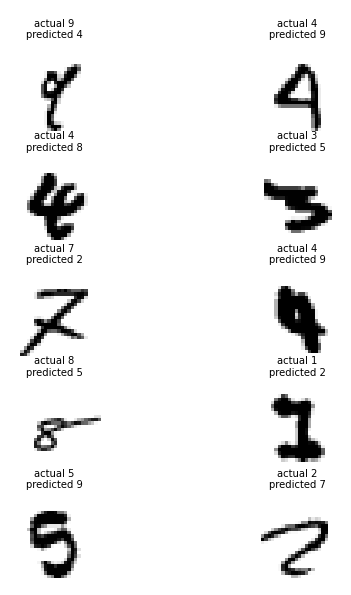

In [10]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# BatchNorm with no regularization

In [11]:
experiment_name='BatchNorm'
norm_type='BN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

Epoch 1:


Loss=0.38114264607429504 Batch_id=937 Accuracy=78.69: 100%|██████████| 938/938 [01:32<00:00, 10.17it/s]



Test set: Average loss: 0.0926, Accuracy: 9796/10000 (97.96%)

Epoch 2:


Loss=0.1607532948255539 Batch_id=937 Accuracy=94.72: 100%|██████████| 938/938 [01:32<00:00, 10.19it/s]



Test set: Average loss: 0.0492, Accuracy: 9845/10000 (98.45%)

Epoch 3:


Loss=0.2553959786891937 Batch_id=937 Accuracy=96.07: 100%|██████████| 938/938 [01:30<00:00, 10.37it/s]



Test set: Average loss: 0.0513, Accuracy: 9838/10000 (98.38%)

Epoch 4:


Loss=0.30566662549972534 Batch_id=937 Accuracy=96.84: 100%|██████████| 938/938 [01:35<00:00,  9.81it/s]



Test set: Average loss: 0.0371, Accuracy: 9877/10000 (98.77%)

Epoch 5:


Loss=0.20473545789718628 Batch_id=937 Accuracy=97.06: 100%|██████████| 938/938 [01:32<00:00, 10.13it/s]



Test set: Average loss: 0.0326, Accuracy: 9894/10000 (98.94%)

Epoch 6:


Loss=0.015233656391501427 Batch_id=937 Accuracy=97.44: 100%|██████████| 938/938 [01:32<00:00, 10.14it/s]



Test set: Average loss: 0.0295, Accuracy: 9901/10000 (99.01%)

Epoch 7:


Loss=0.04161307215690613 Batch_id=937 Accuracy=97.56: 100%|██████████| 938/938 [01:31<00:00, 10.20it/s]



Test set: Average loss: 0.0223, Accuracy: 9919/10000 (99.19%)

Epoch 8:


Loss=0.02387506328523159 Batch_id=937 Accuracy=97.70: 100%|██████████| 938/938 [01:30<00:00, 10.34it/s]



Test set: Average loss: 0.0288, Accuracy: 9902/10000 (99.02%)

Epoch 9:


Loss=0.36749082803726196 Batch_id=937 Accuracy=97.73: 100%|██████████| 938/938 [01:33<00:00, 10.01it/s]



Test set: Average loss: 0.0265, Accuracy: 9909/10000 (99.09%)

Epoch 10:


Loss=0.06654385477304459 Batch_id=937 Accuracy=97.86: 100%|██████████| 938/938 [01:34<00:00,  9.98it/s]



Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

Epoch 11:


Loss=0.021325604990124702 Batch_id=937 Accuracy=97.97: 100%|██████████| 938/938 [01:36<00:00,  9.73it/s]



Test set: Average loss: 0.0260, Accuracy: 9923/10000 (99.23%)

Epoch 12:


Loss=0.016802601516246796 Batch_id=937 Accuracy=98.17: 100%|██████████| 938/938 [01:34<00:00,  9.92it/s]



Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Epoch 13:


Loss=0.10882780700922012 Batch_id=937 Accuracy=98.16: 100%|██████████| 938/938 [01:31<00:00, 10.20it/s]



Test set: Average loss: 0.0169, Accuracy: 9943/10000 (99.43%)

Epoch 14:


Loss=0.07162480056285858 Batch_id=937 Accuracy=98.23: 100%|██████████| 938/938 [01:33<00:00, 10.05it/s]



Test set: Average loss: 0.0229, Accuracy: 9918/10000 (99.18%)

Epoch 15:


Loss=0.02253902330994606 Batch_id=937 Accuracy=98.31: 100%|██████████| 938/938 [01:32<00:00, 10.12it/s]



Test set: Average loss: 0.0206, Accuracy: 9928/10000 (99.28%)

Epoch 16:


Loss=0.012862950563430786 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [01:33<00:00, 10.05it/s]



Test set: Average loss: 0.0177, Accuracy: 9944/10000 (99.44%)

Epoch 17:


Loss=0.006006099749356508 Batch_id=937 Accuracy=98.46: 100%|██████████| 938/938 [01:33<00:00, 10.07it/s]



Test set: Average loss: 0.0173, Accuracy: 9939/10000 (99.39%)

Epoch 18:


Loss=0.03324026241898537 Batch_id=937 Accuracy=98.57: 100%|██████████| 938/938 [01:32<00:00, 10.17it/s]



Test set: Average loss: 0.0165, Accuracy: 9940/10000 (99.40%)

Epoch 19:


Loss=0.03821927681565285 Batch_id=937 Accuracy=98.54: 100%|██████████| 938/938 [01:34<00:00,  9.95it/s]



Test set: Average loss: 0.0159, Accuracy: 9942/10000 (99.42%)

Epoch 20:


Loss=0.02094925381243229 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [01:34<00:00,  9.97it/s]



Test set: Average loss: 0.0157, Accuracy: 9948/10000 (99.48%)



# Misclassified Images for Exp7

Total wrong predictions are 52


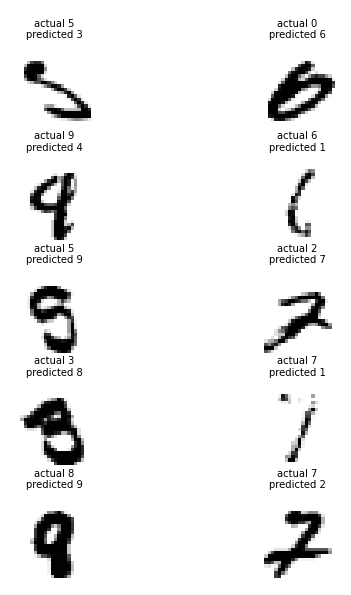

In [12]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

# Plot Metrics for all Experiments

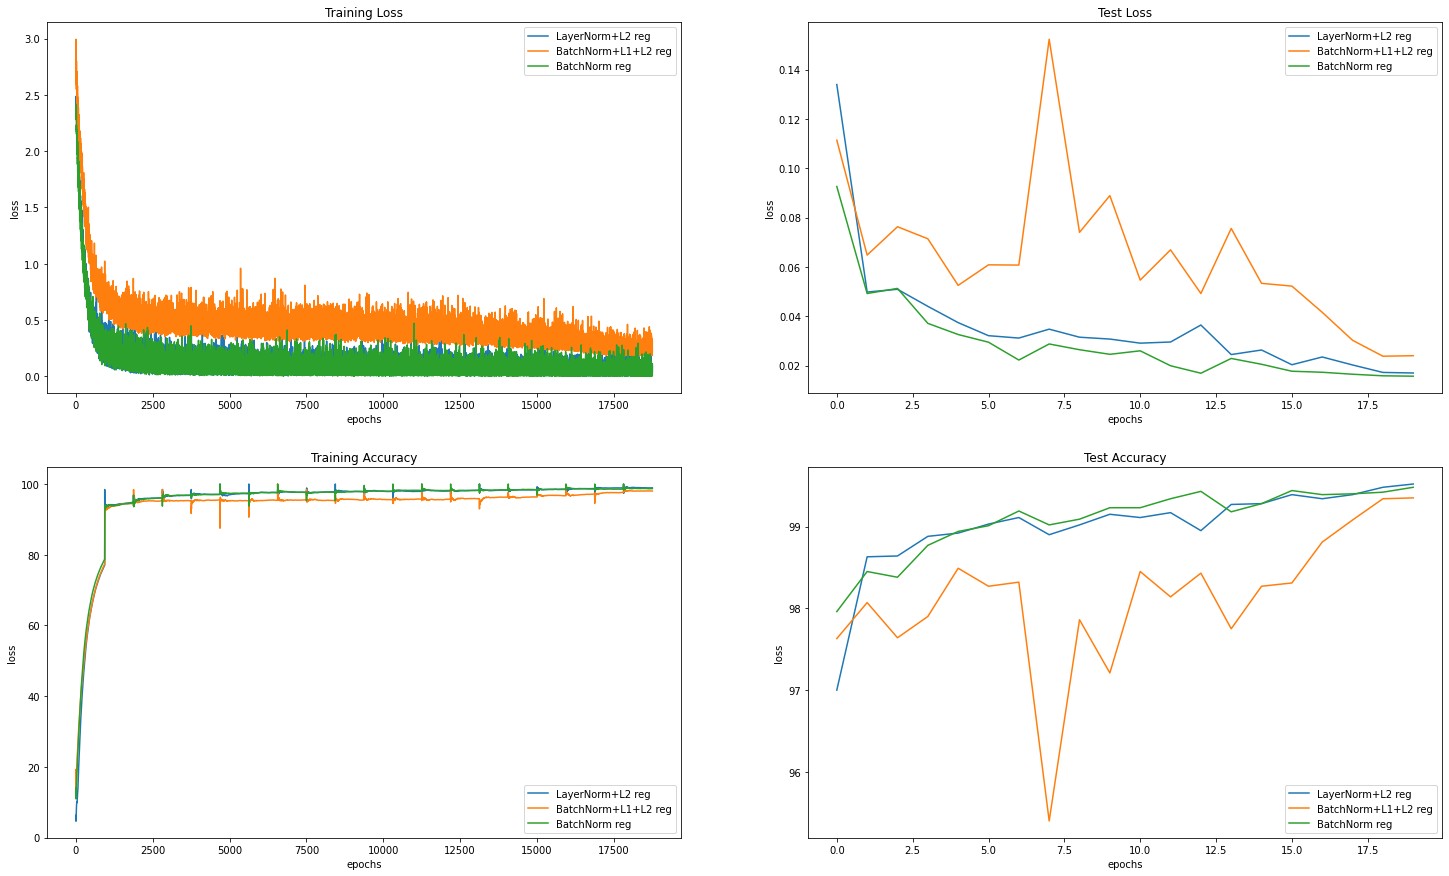

In [13]:
plot_metrics.plot_metrics(exp_metrics)